# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Session 08: Intro to Probability Theory. Experimental and Theoretical Probability. Discrete Random Variables

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

---

## 1. Event and Experimental Probability

When asked: *What's the probability of landing Tails when tossing a (fair) coin?* You'd (probably) answer: $\frac{1}{2}$. Or 50%. But what does that mean?

And when asked: *What's the probability of getting 6 when rolling a six-sided (fair) die?* The expected answer: $\frac{1}{6}$. *What about NOT getting 6?* It's: $\frac{5}{6}$. And *getting a number less than five?* $\frac{2}{3}$? But what do those numbers mean?

And and - *The probability of drawing an Ace from a (fair) deck of cards?*

---

Let's get back to the coin. $\frac{1}{2}$ says you. But what does it mean? Maybe you ment that out of two tossings you'll land exactly one Tails ($TH$ or $HT$)? Okay, let's toss a coin two times. I got $TT$. Maybe my assumption was wrong? Or I've just got unlucky? Let's toss it again. $HT$ this time. Maybe I'm actually right? Or I got lucky. Another two tosses! $HH$. Hmm... Unlucky again? But can I talk about luck in mathematics and in hypothesis testing?

What about the other answer: 50%. Does that mean that I'll land Tails exactly half the times when tossing a coin $N$ times? Let's toss it, say, 10 times. But I don't actually have a coin. Luckily I have Python which can simulate tossing a coin. 

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.default_rng(seed=1023)

In [2]:
coin = ['H', 'T']

tossing = rng.choice(coin, size=10)
tossing

array(['H', 'H', 'T', 'T', 'T', 'T', 'H', 'T', 'H', 'T'], dtype='<U1')

6 of 10 Tails. Close, but not quite 50%. But, wait. 50% also means 50/100. Let's toss a coin 100 times then. 

In [3]:
tossing = rng.choice(coin, size=100)
tossing

array(['T', 'H', 'H', 'H', 'T', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'T',
       'H', 'T', 'H', 'H', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'H', 'H',
       'T', 'H', 'H', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H',
       'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'T', 'T', 'H', 'H',
       'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'H', 'T',
       'T', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'H',
       'T', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T',
       'H', 'T', 'H', 'T', 'T', 'T', 'H', 'H', 'H'], dtype='<U1')

How many Tails, then?

In [4]:
np.unique(tossing, return_counts=True)

(array(['H', 'T'], dtype='<U1'), array([53, 47], dtype=int64))

47/100. Not bad. But not quite 50%. Lucky, but not as quite? (But can I talk about luck in mathematics and in hypothesis testing?) What if those 50% is actually an *approximation* of the result? Let's toss a coin 1000 times.  

In [5]:
tossing = rng.choice(coin, size=1000)
np.unique(tossing, return_counts=True)

(array(['H', 'T'], dtype='<U1'), array([480, 520], dtype=int64))

520/1000. That's 52%. And that's not that quite bad *approximation*. But still... Now, let's toss a coin ONE MILLION TIMES.

In [6]:
tossing = rng.choice(coin, size=10**6)
np.unique(tossing, return_counts=True)

(array(['H', 'T'], dtype='<U1'), array([500537, 499463], dtype=int64))

In [7]:
499463/10**6

0.499463

Well - that's 49.95%, almost 50%. Quite good approximation. 

What if tossed a coin more than million times?

In [8]:
tossing = rng.choice(coin, size=10**7)
np.unique(tossing, return_counts=True)

(array(['H', 'T'], dtype='<U1'), array([4999908, 5000092], dtype=int64))

In [9]:
5000092/10**7

0.5000092

This is even better, veeeery close to 50%; 50.001%, to be more exact.

And if we tossed a coin **infinitely many times**? Then there is no approximation. We'd get 50% sharp. Mathematically, we can write this

$$ P(T) = \lim_{N_{\rm TRIES}\rightarrow\infty}\frac{n_{\rm HITS}}{N_{\rm TRIES}} = 0.5 = \frac{1}{2}.$$

What are all these letters? Let's interpret this formula one by one. 

- $T$ is the *event*: event of landing Tails when tossing ONE coin. 


- $P$ is the *probability*: we may consider it as a function which *measures* how probable an event is. So, $P(T)$ is probability of langing Tails when tossing one coin. 


- $N_{\rm TRIES}$ is the number of trials of the SAME experiment. In our case, it's the number of tossing a coin. 


- $n_{\rm HITS}$ is the number of 'hits', i.e. the number of desired outcomes in our set of trials. In our case, it's the number of Tails landed. 


- $\lim_{N_{\rm TRIES}\rightarrow\infty}$ is the *limit*: a value of the fraction $\frac{n_{\rm HITS}}{N_{\rm TRIES}}$ which we would obtain if we would *theoretically* be able to toss a coin infinitely many times in our finite lives. But we can't do that. We can only obtain an *experimental* (or *statistical*) approximation of the *theoretical* value in finite number of trials. And as we demonstrated - the larger number of trials, the better the approximation. 

***

Let's now illustrate this *limit* on another example: rolling a six-sided die. Intuintively we say that the probability of getting a 6 is $\frac{1}{6}$, or 16.666...% . Similarly as with the coin, we'll simulate rolling a die for various numbers of trials and list the results, i.e. approximations of theoretical probability.

In [10]:
exp_prob_df = pd.DataFrame(columns=['No. of Rolls', 'No. of 6s', 'Experimental Probability'])

number_of_rolls = np.logspace(1.75, 7, 100, dtype=int).tolist()
number_of_6s = []
die = list(range(1, 7))
           
for n_rolls in number_of_rolls:
    rolling = rng.choice(die, size=n_rolls)
    
    results = np.unique(rolling, return_counts=True)
    n_6 = results[1][-1]
    number_of_6s.append(n_6)

number_of_6s = np.asarray(number_of_6s)

exp_prob_df['No. of Rolls'] = number_of_rolls
exp_prob_df['No. of 6s'] = number_of_6s
exp_prob_df['Experimental Probability'] = np.round(number_of_6s/number_of_rolls, 5)
    
    
print(exp_prob_df.to_markdown())

|    |     No. of Rolls |        No. of 6s |   Experimental Probability |
|---:|-----------------:|-----------------:|---------------------------:|
|  0 |     56           |      6           |                    0.10714 |
|  1 |     63           |     22           |                    0.34921 |
|  2 |     71           |     12           |                    0.16901 |
|  3 |     81           |     16           |                    0.19753 |
|  4 |     91           |     12           |                    0.13187 |
|  5 |    103           |     20           |                    0.19417 |
|  6 |    116           |     14           |                    0.12069 |
|  7 |    132           |     23           |                    0.17424 |
|  8 |    149           |     26           |                    0.1745  |
|  9 |    168           |     31           |                    0.18452 |
| 10 |    190           |     36           |                    0.18947 |
| 11 |    215           |     32      

And here's how our limit looks like:

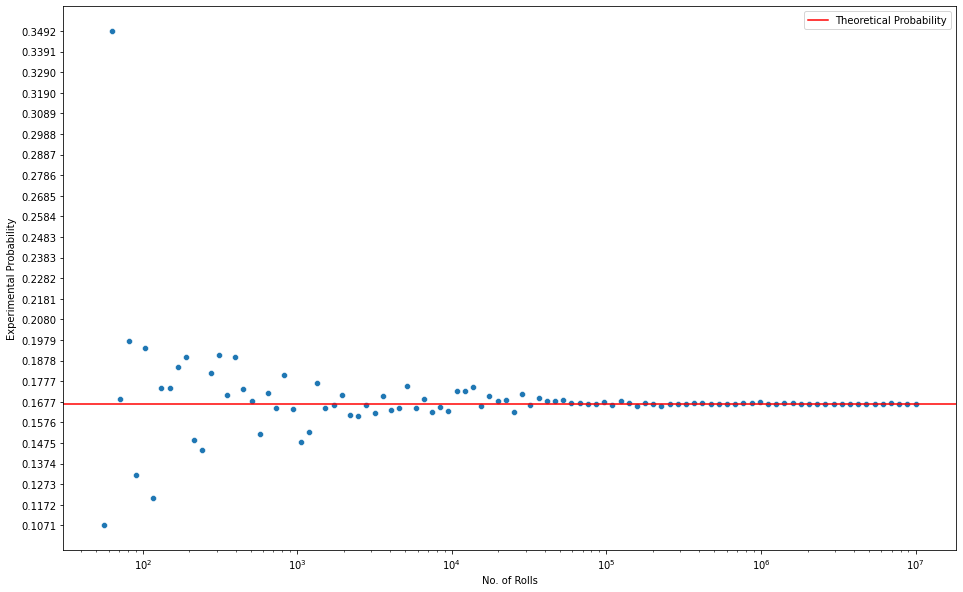

In [11]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.scatterplot(ax = ax, data = exp_prob_df, x='No. of Rolls', y='Experimental Probability');
ax.axhline(.16667, c='r')

ax.set_xscale('log')
ax.set_yticks(np.linspace(exp_prob_df['Experimental Probability'].min(), exp_prob_df['Experimental Probability'].max(), 25))
ax.legend(['Theoretical Probability']);

From the scatterplot above we see how the values of ratio $\frac{n_{\rm HITS}}{N_{\rm TRIES}}$ converge towards the predicted theoretical probability of 16.666...% as $N_{\rm TRIES}\rightarrow\infty$.

But, is there a way to calculate theoretical probability **exactly**?

## 2. $\sigma$-Algebra of Events and Theoretical Probability

In order to be able to speak properly about theoretical probability (and be able to compute it), we need to introduce *$\sigma$-algebra of events* and *probability-as-a-measure*. We can consider $\sigma$-algebra of events as a family of sets where every set is an event, and every element of this event-set is an *outcome* for which consider the evenet realized, i.e. a *favorable outcome*. 

For example, if we toss a coin two times, then one event-set might be

$$ A - {\rm Landed\ 1\ Heads\ and\ 1\ Tails}, $$

and its elements are

$$ A = \{HT, TH\}.$$

A set of all the possible outcomes for a given experiment/observation is called the *universal set*. It is denoted by $\Omega$ and it is the set upon which $\sigma$-algebra of events is built upon, from the subsets $A\subset\Omega$ of the universal set.  

For tossing a coin two times we have

$$ \Omega = \{HH, HT, TH, TT\},$$

and obviously

$$ A \subset \Omega. $$

Let $\Sigma$ be a $\sigma$-algebra of events on $\Omega$, and $A$ and $B$ two events (which we write $A, B\in \Sigma$). Then we have:

$$1^\circ\quad \emptyset,\ \Omega \in \Sigma$$

$$2^\circ\quad A^C \in \Sigma$$

$$3^\circ\quad A\cup B \in \Sigma$$

$$4^\circ\quad A\cap B \in \Sigma.$$

What do these cryptic messages even mean? Let's explain them one by one, I promise they make sense.

$$1^\circ\quad \emptyset,\ \Omega \in \Sigma$$

This means that the empty set $\emptyset$ and the total set $\Omega$ are also considered as events.

$\emptyset$ is called an *impossible event*, and it does not contain any (possible) outcome. 

$\Omega$, viewed as an event is called *certain event* - getting any outcome from all the possible outcomes is definitely a certain event. 

---

$$2^\circ\quad A^C \in \Sigma$$

An complementary set of $A$: $A^C = \Omega\setminus A$ is also considered as an event. Every unfavourable outcome of $A$ is favourable for $A^C$ (and vice versa). So, for the event $A$ as defined above, we have:

$$ A^C = \{HH, TT\}. $$

---

$$3^\circ\quad A\cup B \in \Sigma$$

A union of two events (denoted also as $A + B$) is also considered as an event. But what is a union of two events actually? We say that the event $A\cup B$ is realized when at least one of the events $A$ **OR** $B$ is realized. $A\cup B$ contains all the outcomes which are favourable for either the event $A$ **OR** event $B$.

For example, if we define event $B$ as

$$B - {\rm Landed\ 2\ Tails,}$$

we have 

$$ A\cup B = \{HT, TH, TT\}.$$

---

$$4^\circ\quad A\cap B \in \Sigma.$$

An intersection of two events (denoted also as AB) is also considered as an event. We say that the event $AB$ is realized when both events $A$ **AND** $B$ are simultaneously realized. $AB$ contains all the outcomes which are favourable for both events $A$ **AND** $B$. 

For examle, if we define event $C$ as 

$$ C - {\rm Tails\ in\ the\ first\ coin\ toss}, $$

we have 

$$ AC = \{HT, TH\} \cap \{TH, TT\} = \{TH\}.$$

Two events $A$ and $B$ are *mutually exclusive* or *disjoint* if $A\cap B = \emptyset$, i.e. if realization of both events simultaneously is an impossible event.

Two events $A$ and $B$ are *independant* if the outcome of one event does not influence the outcome of the other. For example, when tossing a coin two times, the result of the first toss does not influence the outcome of the second.

---

One more importan notion is the *elementary event* - an event containing a single possible outcome. So, for tossing our coin two times, elementary events are: $\{HH\},\ \{HT\},\ \{TH\}$ and $\{TT\}$.

$\sigma$-algebras of events serve us as a brige between the natural language by which we describe events and their outcomes with formal mathematical language to describe them via sets, their elements and set operations. The upside of mathematical objects is that it is natural to impose some measure on them, and now we can measure the events, i.e. measure the probability of event realization. So we can define probability-as-a-measure, that is a mapping $P$ from $\sigma$-algebra of events to interval a set of real numbers via following set of *axioms* (known as *Kolmogorov Axioms*):

**Axiom 1**: For any event $A$ we have

$$ P(A)\geqslant 0.$$

**Axiom 2**: For certain event $\Omega$ we have

$$ P(\Omega) = 1.$$

**Axiom 3**: For mutually exclusive events $A_1, A_2, \ldots, A_n, \ldots$ we have

$$P\Big(\bigcup_{i=1}^{\infty}A_i\Big) = \sum_{i=1}^{\infty}P(A_i).$$

What do those axioms tell us?

**Axiom 1** means that the probability of any event has to be some non-negative real number; in other words - we cannot have negative probability (the same way we cannot have negative length, surface or volume - which are also measures of some kind)

**Axiom 2** says that the probability of a certain event is 1 (or 100%). As we know that $\Omega$, viewed as a set, is a universal set, i.e. set that contains all the possible outcomes - this axiom also tells us that the probability of observing any outcome of all possible defined outcomes is equal to 1. 

If we want to compute a probability of some union of mutually exclusive events, **Axiom 3** tells us that we can do that just by summing the probabilities of every single event. 

***

And here's a nice reminder for $\sigma$-algebras and Kolmogorov Axioms:

<img src="prob.png" style="width: 800px;"/>

These axioms have very usefull consequences; if $A$ and $B$ are two events, we have:

$$ 1^\circ\ P(\emptyset) = 0, $$

$$ 2^\circ\ 0 \leqslant P(A) \leqslant 1, $$

$$ 3^\circ\ P(A^C) = 1 - P(A), $$

$$ 4^\circ\ A\subseteq B \Rightarrow P(A) \leqslant P(B).$$

$$ 5^\circ\ A,\ B\ {\rm indep.} \Rightarrow P(AB) = P(A)P(B).$$

Let's now go over these consequences. 

$$ 1^\circ\ P(\emptyset) = 0 $$

We saw that impossible event is represented by $\emptyset$. So, this tells us that the probability of an impossible event is 0. 

***

$$ 2^\circ\ 0 \leqslant P(A) \leqslant 1 $$

Not only that the probability of an event is some non-negative real number - it's a real number belonging to the interval [0, 1]; and the endpoints of this interval correspond to the impossible event ($P(\emptyset) = 0$) and certain event ($P(\Omega) = 1$). The closer the probability is to 1, the more probable is the realization of an event. This also alows us to speak about probabilities in terms of percents. 

***

$$ 3^\circ\ P(A^C) = 1 - P(A) $$

This tells us how to simply calculate probability of a complementary event. If a probability of an event happening is 22%, then the probability of it NOT happening is 78%.

***

$$4^\circ\ A\subseteq B \Rightarrow P(A) \leqslant P(B) $$

If set $A$ is contained in set $B$, i.e. if all the outcomes favourable for event $A$ are also favourable for event $B$, then event $A$ has smaller (or equal) chances for realization than the event $B$. In other words - events with smaller set of favourable outcomes are less probable. 

***

$$ 5^\circ\ A,\ B\ {\rm indep.} \Rightarrow P(AB) = P(A)P(B).$$

If two events are independant, then the probability of them both occuring is equal to the product of probabilites of each event occuring independantly. If we toss a coin two times, we can calculate

$$P(HT) = P(H)P(T).$$

---

All this talk about the Probability Theory, but we still haven't figured out how to calculate theoretical probability. Don't worry, we are almost there - and we have all the ingredients to write a formula that stems quite naturally from the theoretical foundations above. 

As we saw, probabilty of an event should be some number between 0 and 1, with probabilities of impossible and certain event as extreme values. And the bigger the event/set is, the biger its probability should be. This leads us to define theoretical probability of an event ($A$) via the following simple formula:

$$P(A) = \frac{|A|}{|\Omega|} = \frac{{\rm No.\ of\ all\ the\ favourable\ outcomes\ for}\ A}{{\rm No.\ of\ all\ the\ possible\ outcomes}}.$$

($|A|$ is the *cardinality* of a set, i.e. a number of elements that set has.)

One can easily check that formula for the probability, as given above, satisfies all the Kolmogorov Axioms and, of course, all the listed consequences. 

***

Now that we have the 'formula for probability' we can easily calculate probabilities of the events listed at the beginning of this notebook. 

- Probability of landing Tails on a coin toss:

$$P(T) = \frac{|\{T\}|}{|\{H, T\}|} = \frac{1}{2}.$$


- Probability of landing at least one Tails on two coin tosses (event $A$):

$$P(A) = \frac{|\{TH, HT, TT\}|}{|\{HH, TH, HT, TT\}|} = \frac{3}{4}.$$


- Probability of getting 6 when rolling a six-sided die:

$$P(X = 6) = \frac{|\{6\}|}{|\{1, 2, 3, 4, 5, 6\}|} = \frac{1}{6}.$$



- Probability of getting less than 5 when rolling a six-sided die:

$$P(X < 5) = \frac{|\{1, 2, 3, 4\}|}{|\{1, 2, 3, 4, 5, 6\}|} = \frac{4}{6} = \frac{2}{3}.$$



- Probability of getting any number from 1 to 6 when rolling a six-sided die:

$$P(1\leqslant X\leqslant 6) = \frac{|\{1, 2, 3, 4, 5, 6\}|}{|\{1, 2, 3, 4, 5, 6\}|} = \frac{6}{6} = 1.$$



- Probability of getting a 7 when rolling a six-sided die:

$$P(X = 7) = \frac{|\emptyset|}{|\{1, 2, 3, 4, 5, 6\}|} = \frac{0}{6} = 0.$$


- Probability of getting 6 or 7 when rolling a 20-sided die:

$$P(\{X=6\}\cup\{X=7\}) = P(X=6) + P(X=7) = \frac{1}{20} + \frac{1}{20} = \frac{2}{20} = \frac{1}{10}.$$



- Probability of getting less than 19 when rolling a 20-sided die:

$$P(X < 19) = 1 - P(\{X < 19\}^C) = 1 - P(X\geqslant 19) =  1 -\frac{|\{19, 20\}|}{|\{1, 2, \ldots, 20\}|} = 1 - \frac{2}{20} = \frac{18}{20} = \frac{9}{10}.$$


- Probability of getting two sixes in two dice rolls:

$$P(\{X_1 = 6\}\cap\{X_2 = 6\}) = P(\{X_1 = 6\})P(\{X_2 = 6\}) = \frac{1}{6}\cdot\frac{1}{6} = \frac{1}{36}.$$


- Probability of drawing an Ace from a deck of cards:

In [12]:
print('P(X = A) = |{\U0001F0A1, \U0001F0B1, \U0001F0C1, \U0001F0D1}|/|Whole Deck of Cards| = 4/52 = 1/13.')

P(X = A) = |{🂡, 🂱, 🃁, 🃑}|/|Whole Deck of Cards| = 4/52 = 1/13.


Even though we have a tool to calculate probability of an event exactly, we shouldn't forget about experimental probability. First, it can serve us to experimentally check our theoretical calculation. Secondly, and more important: sometimes calculating theoretical probability is difficult, or even impossible; so, performing the experiments and noting down the results is a way to obtain the probability of an event. 

While we've been using the given formula for calculating theoretical probabilities, there was actually one important thing that we hid under the rug - the formula works only in case when $\Omega$ is finite set. But what if $\Omega$ is infinite? Does all this mathematical construction breaks down? Actually no. $\sigma$-algebras, Kolmogorov Axioms and their consequences actually give us tools to handle even infinite $\Omega$s, and we'll see how later on. 

But first let's talk about *random variables*.

## 3. Random variable: a Discrete Type

When we were calculating theoretical probabilities a bit above we introduced the following notation $P(X = 6)$ or $P(X \geqslant 19)$. What is this $X$? It is actually a random variable (RV) - a varable which can take one of the several different values, each with its own probability. 

There are two types of random variables: *discrete* and *(absolutely) continuous*. Values of RV are elements, i.e. outcomes of set $\Omega$. If $\Omega$ is finite or *countably infinite*, then associated RV is discrete. If $\Omega$ is *uncountably infinite*, then the corresponding RV is continuous. 


We'll speak about discrete RVs now. 

---

A discrete random variable is fully described if we know all the values it can take, and all the probabilities corresponding to those values. This 'description' of a random variable is called its *distribution*. So, 'knowing' a random variable is equivalent to 'knowing' its distribution. 

For tossing a coin, a random variable $X$ can take two values: Heads and Tails, each with probability $\frac{1}{2}$. We can write its distribution as

$$ X :
\begin{pmatrix}
H & T\\
\frac{1}{2} & \frac{1}{2}
\end{pmatrix}.
$$

This 'function' which assigns a probability to each outcome is also called *probability mass function* or *p.m.f*.

For rolling a six sided die, we have a random variable which can take some of the values from the die given with p.m.f

$$ X :
\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6\\
\frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6}
\end{pmatrix}.
$$

We can even define RVs on our own. The only important thing is that all the probabilites in its distribution need to sum to 1 (as the union of all elementary events, i.e. of every possible outcome gives $\Omega$, and $P(\Omega) = 1$). 

For example:


$$ X :
\begin{pmatrix}
-1 & 0 & 2 & 4.7\\
 0.2 & 0.05 & 0.45 & 0.3
\end{pmatrix}.
$$

We can simulate the outcomes of this RV using `rng.choice()`:

In [13]:
X = [-1, 0, 2, 4.7]

rng.choice(X, p=[.2, .05, .45, .3])

4.7

In [14]:
outcomes = rng.choice(X, p=[.2, .05, .45, .3], size=100)
outcomes

array([ 4.7,  2. ,  2. ,  2. ,  4.7,  2. ,  2. ,  0. , -1. ,  2. ,  2. ,
        2. , -1. ,  2. ,  0. ,  2. ,  4.7,  2. ,  0. ,  2. ,  2. ,  2. ,
        4.7,  2. ,  2. ,  2. ,  2. ,  4.7,  2. ,  4.7,  4.7,  2. ,  0. ,
       -1. , -1. ,  4.7,  4.7,  4.7,  2. ,  2. ,  2. ,  2. , -1. ,  2. ,
        2. ,  4.7,  2. ,  2. ,  2. ,  4.7,  4.7,  4.7, -1. ,  2. ,  0. ,
        2. ,  2. , -1. ,  0. ,  2. , -1. ,  4.7,  2. ,  4.7,  2. ,  4.7,
        4.7,  2. ,  4.7, -1. ,  0. ,  2. , -1. ,  4.7,  2. , -1. ,  4.7,
        2. ,  2. ,  2. ,  4.7,  2. ,  2. ,  4.7,  4.7,  0. , -1. ,  2. ,
       -1. ,  2. ,  4.7,  2. , -1. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,
        2. ])

In [15]:
no_outcomes = np.unique(outcomes, return_counts=True)
no_outcomes

(array([-1. ,  0. ,  2. ,  4.7]), array([14,  8, 53, 25], dtype=int64))

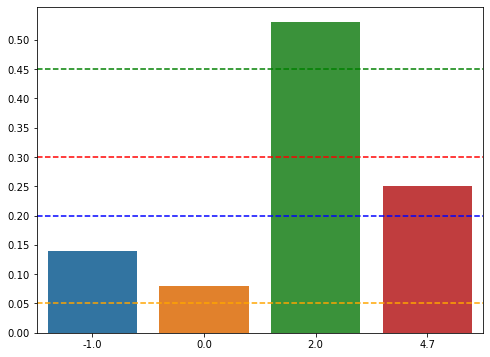

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))



sns.barplot(ax = ax, x = no_outcomes[0], y = no_outcomes[1]/100)
ax.axhline(.2, c='b', linestyle='--')
ax.axhline(.05, c='orange', linestyle='--')
ax.axhline(.45, c='green', linestyle='--')
ax.axhline(.3, c='red', linestyle='--')
ax.set_yticks(np.arange(0, .55, .05));

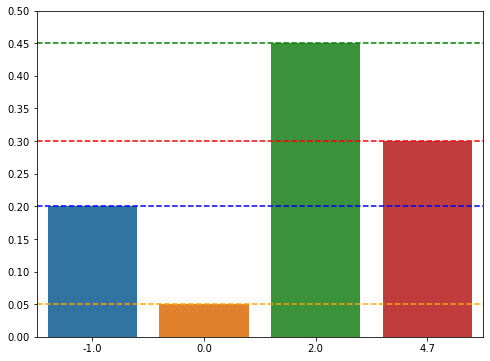

In [17]:
no_tries = 10**6
outcomes = rng.choice(X, p=[.2, .05, .45, .3], size=no_tries)
no_outcomes = np.unique(outcomes, return_counts=True)

fig, ax = plt.subplots(figsize=(8, 6))



sns.barplot(ax = ax, x = no_outcomes[0], y = no_outcomes[1]/no_tries)
ax.axhline(.2, c='b', linestyle='--')
ax.axhline(.05, c='orange', linestyle='--')
ax.axhline(.45, c='green', linestyle='--')
ax.axhline(.3, c='red', linestyle='--')
ax.set_yticks(np.arange(0, .55, .05));

***

Let's assume we have a following discrete random variable which can take infinitely many values:


$$ X :
\begin{pmatrix}
1 & 2 & \cdots & k & \cdots \\
p_1 & p_2 & \cdots & p_k & \cdots & 
\end{pmatrix}.
$$

Using its distribution, we can calculate probabilities of some events in the following manner (which also applies for finite RVs):

$$ P(X = k) = p_k $$

$$ P(X \leqslant k) = p_1 + p_2 + \cdots + p_k $$

$$ P(X < k) = P(X \leqslant k - 1) = p_1 + p_2 + \cdots + p_{k-1} $$

$$ P(3 \leqslant X \leqslant k) = p_3 + p_4 + \cdots + p_k $$

$$ P(X > k) = 1 - P(X \leqslant k) = 1 - (p_1 + p_2 + \cdots + p_k) $$

---

Probability $P(X\leqslant k)$ is quite an important one - it even has it's name *cumulative distribution function* or *c.d.f.*. It's denoted by $F(k)$, and it simply sums all the probabilities for all values up to $k$:

$$ F :
\begin{pmatrix}
1 & 2 &  3 & \cdots & N\\
p_1 & p_1 + p_2  & p_1 + p_2 + p_3 & \cdots & 1 
\end{pmatrix}.
$$

## 4. Discrete Type Distributions

Random or *stochastic* processes are not just some mathematical intellectual plaything. They occur all around us and within us. Many stochastic natural and social phenomena behave according to some distribution, and can be modelled according to that distribution. Here we go through some of those important discrete-type distributions.

### Bernoulli Distribution

The simplest discrete distribution is Bernoulli Distribution - it's a distribution of a RV that has binary outcomes - yes/no, hit/miss or success/failure. The *parameter* of this distribution is $p$ - the probability of 'hit'. This distribution looks like:

$$ X :
\begin{pmatrix}
0 & 1\\
1 - p & p
\end{pmatrix}.
$$

To sample from Bernoulli Distribution we can use `rng.choice()` with two outcomes. Say, we have a population that gives a 'yes' answer to some question in 2/3 cases and 'no' in 1/3 cases, and we want to draw a sample of 100 from it. Here's a sample:

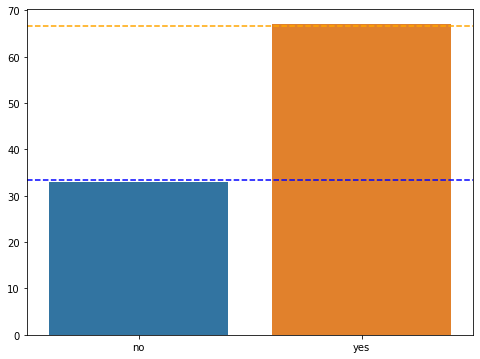

In [18]:
X = ['yes', 'no']

no_tries = 100
outcomes = rng.choice(X, p=[2/3, 1/3], size=no_tries)
no_outcomes = np.unique(outcomes, return_counts=True)


fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(ax = ax, x = no_outcomes[0], y = no_outcomes[1])

ax.axhline(1/3*no_tries, c='b', linestyle='--')
ax.axhline(2/3*no_tries, c='orange', linestyle='--');

### Binomial Distribution

Binomial distribution gives an answer to the following question: *what's the probability of getting $k$ hits in $n$ trials of the same hit/miss experiment, having probability of hit equal to $p$?*

Binomial Distribution has two parameteres:

- $n$: number of repetitions of the same experiment
- $p$: probability of a hit (success)

If a random variable $X$ has a Binomial Distribution with parameters $n$ and $p$, we write that

$$ X \sim \mathcal{B}(n, p).$$

For example, we'd like to know what's the probability of landing 7 Tails in tossing a coin 10 times. We can approximate this probability by sampling from the Binomial Distribution with parameters $n=10$ and $p=0.5$ ($\mathcal{B}(100, 0.5)$), using `rng.binomial()`.

In [19]:
outcomes = rng.binomial(n=10, p=.5, size=100)
outcomes

array([6, 5, 5, 2, 5, 5, 6, 4, 6, 5, 4, 7, 3, 4, 4, 5, 4, 7, 4, 4, 3, 4,
       6, 7, 4, 4, 7, 4, 3, 6, 3, 5, 8, 5, 7, 5, 6, 2, 8, 6, 6, 4, 5, 6,
       3, 7, 5, 6, 5, 5, 3, 4, 7, 6, 3, 4, 5, 3, 7, 5, 7, 7, 3, 5, 5, 7,
       5, 4, 5, 6, 6, 3, 7, 4, 4, 5, 3, 4, 5, 5, 7, 5, 6, 6, 4, 6, 3, 6,
       8, 4, 6, 6, 7, 5, 7, 3, 8, 5, 5, 5], dtype=int64)

In [20]:
no_outcomes = np.unique(outcomes, return_counts=True)
no_outcomes

(array([2, 3, 4, 5, 6, 7, 8], dtype=int64),
 array([ 2, 13, 20, 27, 19, 15,  4], dtype=int64))

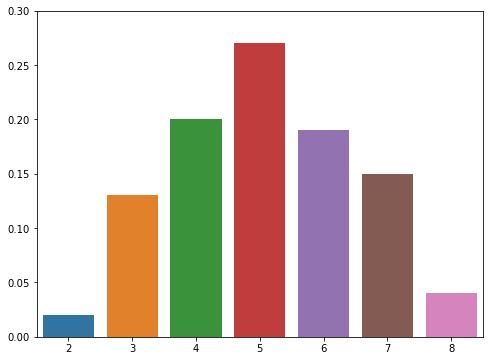

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))



sns.barplot(ax = ax, x = no_outcomes[0], y = no_outcomes[1]/100)
ax.set_yticks(np.arange(0, np.max(no_outcomes[1]/no_tries) + .05, .05));

In [22]:
def sample_from_binomial(n, p, no_tries=10**6, k=None):
    
    outcomes = rng.binomial(n, p, size=no_tries)
    no_outcomes = np.unique(outcomes, return_counts=True)


    fig, ax = plt.subplots(figsize=(8, 6))

    sns.barplot(ax = ax, x = no_outcomes[0], y = no_outcomes[1]/no_tries)
    
    if k:
        theor_p = math.comb(n, k)*p**k*(1-p)**(n-k)
        ax.axhline(theor_p, c='m', linestyle='--')

    ax.set_yticks(np.arange(0, np.max(no_outcomes[1]/no_tries) + .05, .05)); 

In [23]:
def cdf_binomial(n, p):
    outcomes = rng.binomial(n, p, size=10**6)
    no_outcomes = np.unique(outcomes, return_counts=True)


    fig, ax = plt.subplots(2, 1, figsize=(12, 6))

    sns.barplot(ax = ax[0], x = no_outcomes[0], y = no_outcomes[1]/10**6)
    sns.barplot(ax = ax[1], x = no_outcomes[0], y = np.cumsum(no_outcomes[1]/10**6))

    ax[0].set_yticks(np.arange(0, 1.2, .2));     
    ax[1].set_yticks(np.arange(0, 1.2, .2)); 

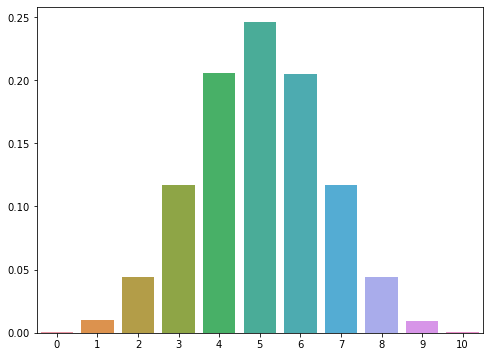

In [24]:
sample_from_binomial(n=10, p=.5, no_tries=10**6)

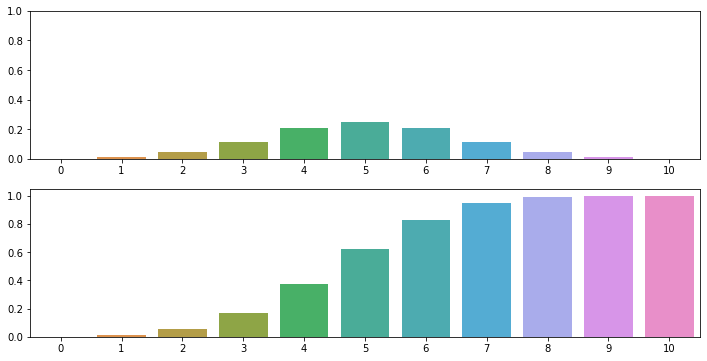

In [25]:
cdf_binomial(n=10, p=.5)

But we can actually calculate these probabilities theoretically, via

$$P(X = k) = \binom{n}{k}p^k(1-p)^{n-k},$$

where $\binom{n}{k}$, called *binomial coefficient*, is

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}.$$

Say we have some unfair coin which lands Tails with probability 0.25, and we toss it three times. Using the formula above for $\mathcal{B}(3, 0.25)$ we obtain the probabilities for number of Tails in 3 tosses $X$:

$$ X :
\begin{pmatrix}
0 & 1 & 2 & 3\\
0.421875 & 0.421875 & 0.140625 & 0.015625
\end{pmatrix}.
$$

And to confirm the results experimentally:

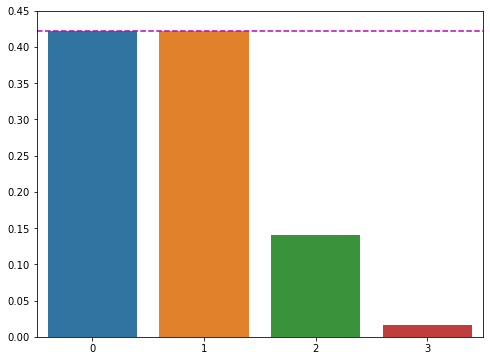

In [26]:
sample_from_binomial(n=3, p=.25, no_tries=10**6, k=1)

### Geometric Distribution

Geometric Distribution gives an answer to the following question: *what's the probability of getting the first hit in $k$th repetition of a hit/miss experiment, if the probability of a hit is $p$?* 

Geometric Distribution has only one parameter: probability of a hit $p$.

Random variable $X$ having Geometric Distribution has (countably) infinite values.

For example, we'd like to know what's the probability of getting a first 6 in 3rd roll of a six-sided die . We can approximate this probability by sampling from the Geometric Distribution with parameter $p=1/6$, using `rng.geometric()`.

In [27]:
outcomes = rng.geometric(p=1/6, size=100)
outcomes

array([ 5,  3,  6,  4,  3,  5,  6,  4,  3, 11,  5,  6,  2,  2,  1,  5,  9,
        2,  3,  2,  3, 10, 13, 13,  2,  7, 11,  5,  2,  1,  3,  3,  2,  8,
       10, 10, 11,  1,  2,  2,  5, 12,  8,  6,  5,  1,  7,  1,  9, 12,  1,
        1,  2,  5, 11,  4,  8,  2,  3,  4,  8,  1,  3,  2,  4,  1,  4, 11,
        9,  5,  1,  4,  1, 10,  4,  4, 12, 13, 15,  4, 19, 17,  5,  2,  6,
        4, 13,  3, 18,  1, 12,  2,  4,  2,  1,  9, 23,  4,  8, 13],
      dtype=int64)

In [28]:
no_outcomes = np.unique(outcomes, return_counts=True)
no_outcomes

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 17, 18, 19,
        23], dtype=int64),
 array([13, 15, 10, 13, 10,  5,  2,  5,  4,  4,  5,  4,  5,  1,  1,  1,  1,
         1], dtype=int64))

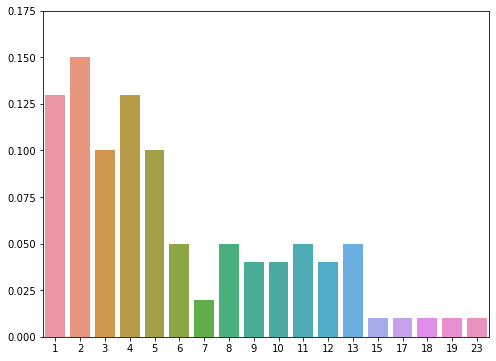

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))



sns.barplot(ax = ax, x = no_outcomes[0], y = no_outcomes[1]/100)
ax.set_yticks(np.arange(0, .2, .025));

In [30]:
def sample_from_geometric(p, no_tries=10**6, k=None):
    
    outcomes = rng.geometric(p, size=no_tries)
    no_outcomes = np.unique(outcomes, return_counts=True)


    fig, ax = plt.subplots(figsize=(20, 6))

    sns.barplot(ax = ax, x = no_outcomes[0], y = no_outcomes[1]/no_tries)
    
    if k:
        theor_p = (1-p)**(k-1)*p
        ax.axhline(theor_p, c='m', linestyle='--')



    ax.set_yticks(np.arange(0, np.max(no_outcomes[1]/no_tries) + .025, .025)); 

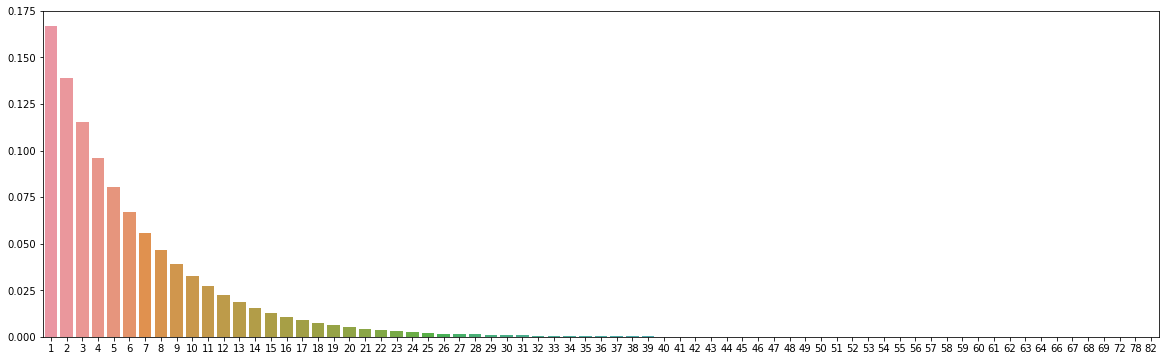

In [31]:
sample_from_geometric(p=1/6, no_tries=10**6)

We can calculate these probabilities theoretically using a formula for a RV having Geometric Distribution:

$$P(X=k) = (1-p)^{k-1}p.$$

So, for our example we have

$$P(X = 3) = \Big(\frac{5}{6}\Big)^2\cdot\frac{1}{6} = 0.1157407407... .$$

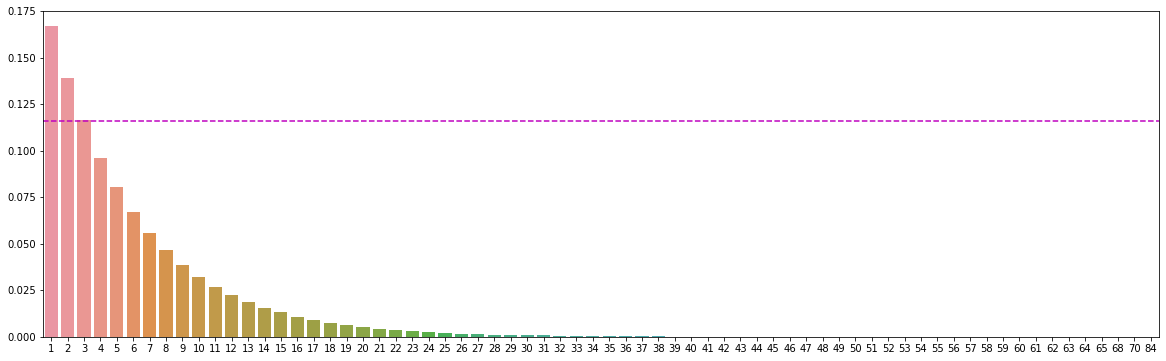

In [32]:
sample_from_geometric(p=1/6, no_tries=10**6, k=3)

In [33]:
def cdf_geometric(p):
    outcomes = rng.geometric(p, size=10**6)
    no_outcomes = np.unique(outcomes, return_counts=True)


    fig, ax = plt.subplots(2, 1, figsize=(22, 6))

    sns.barplot(ax = ax[0], x = no_outcomes[0], y = no_outcomes[1]/10**6)
    sns.barplot(ax = ax[1], x = no_outcomes[0], y = np.cumsum(no_outcomes[1]/10**6))

    ax[0].set_yticks(np.arange(0, 1.2, .2));     
    ax[1].set_yticks(np.arange(0, 1.2, .2)); 

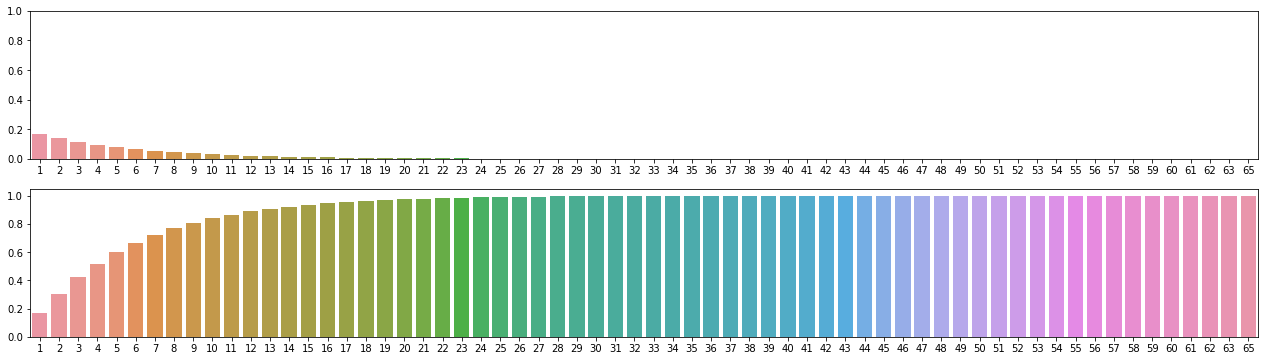

In [34]:
cdf_geometric(p=1/6)

## Discrete Uniform Distribution

This is actually a known one - it's a distribution of a RV where every outcome has the same probability: rolling a six-sided die, for example. The only parameter of this random variable is $N$ - number of values this RV can take. And the probability of each outcome is $\frac{1}{N}$.

We can sample from Discrete Uniform Distribution using `rng.choice()` without the `p` argument. 

Let's sample frequencies of each number when rolling a six-sided die. 

In [35]:
def sample_from_uniform(N, no_tries=10**6):
    
    outcomes = rng.choice(np.arange(1, N+1), size=no_tries)
    no_outcomes = np.unique(outcomes, return_counts=True)


    fig, ax = plt.subplots(figsize=(8, 6))

    sns.barplot(ax = ax, x = no_outcomes[0], y = no_outcomes[1]/no_tries)
    ax.axhline(1/N, c='m', linestyle='--')

    ax.set_yticks(np.arange(0, np.max(no_outcomes[1]/no_tries) + .025, .025)); 

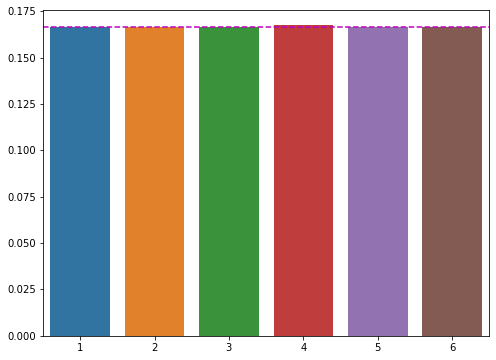

In [36]:
sample_from_uniform(N=6, no_tries=10**6)

## Poisson Distribution

Poisson Distribution gives an answer to the following question: *if the average number of occurences of an event during some time interval is $\lambda$ - what is the probability of that event occuring $k$ times during the that interval?* 

Poisson Distribution has only one parameter: average number of occurences $\lambda$.

Random variable $X$ having Poisson Distribution has (countably) infinite values.

We can sample from Poisson Distribution using `rng.poisson()`.

*Example* (Following and adapting from Ladislaus Bortkiewicz, 1898). Assumption: on the average, 10 soldiers in the Prussian army were killed accidentally by horse kick monthly. What is the probability that 17 soldies in the Prussian army will be accidently killed by horse kicks during the month?

In [37]:
outcomes = rng.poisson(lam=10, size=100)
outcomes

array([ 8,  8, 13, 11,  6, 10, 15, 15,  9,  8, 10,  6,  5,  9,  9,  9, 15,
       14,  7, 14,  8, 16, 12, 12, 10, 12,  9, 18, 13, 17, 12, 10, 10,  8,
       13,  6, 11,  8,  7, 11,  9,  9, 10,  9, 17, 10,  5, 11,  6, 16, 10,
        5,  9, 11, 11,  9, 14,  9, 11,  9,  7, 12,  7,  8, 11, 11, 10, 11,
        3,  7,  7,  5, 11,  9,  3,  5,  9,  9,  6,  7, 12, 13, 10,  4, 12,
        7, 10,  9,  8, 15,  9,  7,  8,  8, 11,  5,  9,  7,  8,  7],
      dtype=int64)

In [38]:
no_outcomes = np.unique(outcomes, return_counts=True)
no_outcomes

(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
       dtype=int64),
 array([ 2,  1,  6,  5, 11, 11, 18, 11, 12,  7,  4,  3,  4,  2,  2,  1],
       dtype=int64))

In [39]:
def sample_from_poisson(lam, no_tries=10**6, k=None):
    
    outcomes = rng.poisson(lam, size=no_tries)
    no_outcomes = np.unique(outcomes, return_counts=True)


    fig, ax = plt.subplots(figsize=(20, 6))

    sns.barplot(ax = ax, x = no_outcomes[0], y = no_outcomes[1]/no_tries)
    
    
    if k:
        p_theor = lam**k*np.exp(-lam)/np.math.factorial(k)
        ax.axhline(p_theor, c='m', linestyle='--')


    ax.set_yticks(np.arange(0, np.max(no_outcomes[1]/no_tries) + .025, .025)); 

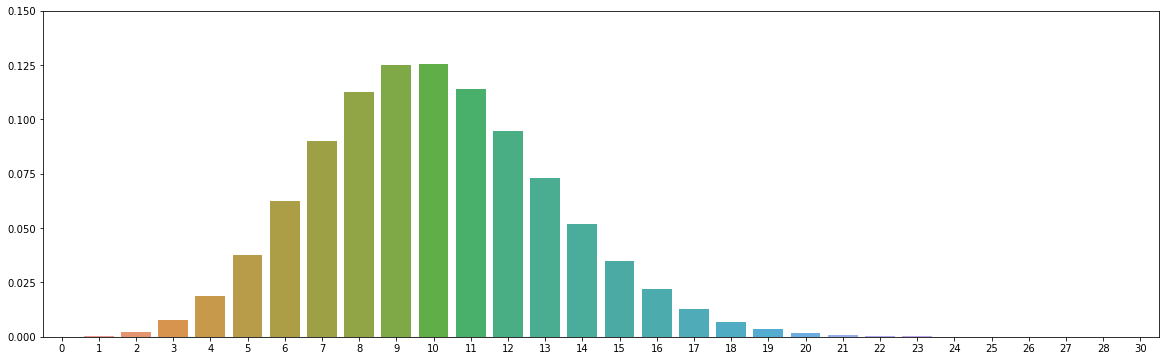

In [40]:
sample_from_poisson(lam=10, no_tries=10**6)

We can calculate these probabilities theoretically using a formula for a RV having Geometric Distribution:

$$P(X=k) = \frac{\lambda^ke^{-\lambda}}{k!}.$$

So, for our example, we have:

$$P(X = 17) = \frac{10^{17}\cdot e^{-10}}{17!} \approx 0.012764 $$

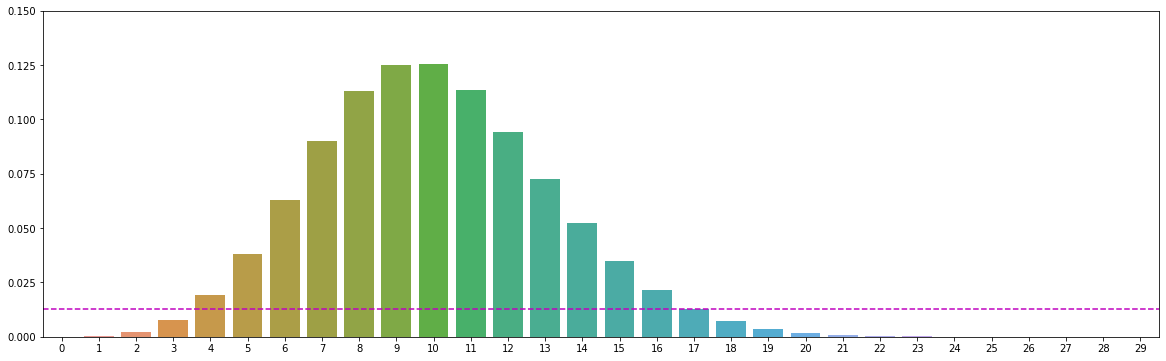

In [41]:
sample_from_poisson(lam=10, no_tries=10**6, k=17)

In [42]:
def cdf_poisson(lam):
    outcomes = rng.poisson(lam, size=10**6)
    no_outcomes = np.unique(outcomes, return_counts=True)


    fig, ax = plt.subplots(2, 1, figsize=(22, 6))

    sns.barplot(ax = ax[0], x = no_outcomes[0], y = no_outcomes[1]/10**6)
    sns.barplot(ax = ax[1], x = no_outcomes[0], y = np.cumsum(no_outcomes[1]/10**6))

    ax[0].set_yticks(np.arange(0, 1.2, .2));     
    ax[1].set_yticks(np.arange(0, 1.2, .2)); 

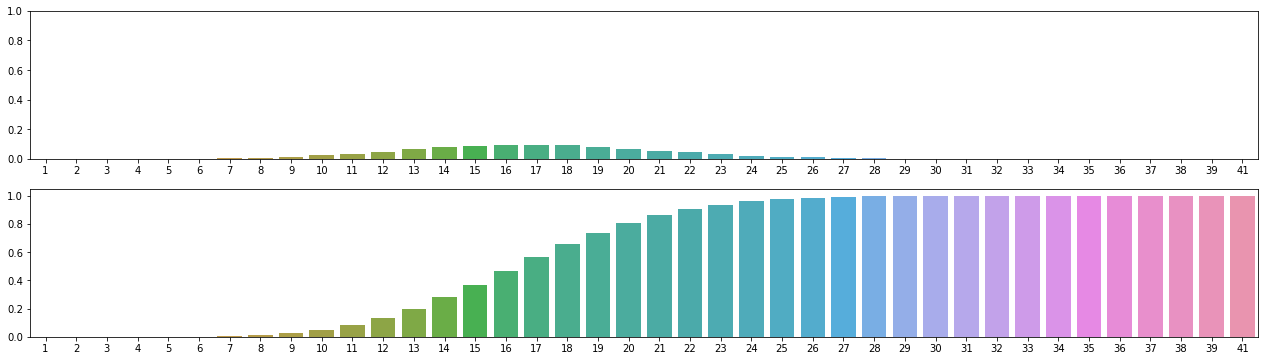

In [43]:
cdf_poisson(lam=17)

## 5. Distributions - Once More, with Feelings. With SciPy

SciPy is a Python module much used by statisticians, which we are also going to be using a bit during our course. SciPy comes quite handy if we need to work with random variables having some known distribution - not only we can use SciPy's methods for sampling from a given distribution, we can use them to calculate theoretical probabilities and c.d.f values. 

Let's first import it.

In [44]:
import scipy

### Binomial Distribution 

For Binomial Distribution we use `binom` object from `scipy.stats` module

In [45]:
from scipy.stats import binom

We can sample from $\mathcal{B}(10, 0.5)$ using `binom.rvs()` method:

In [46]:
binom.rvs(n=10, p=.5, size=100)

array([5, 3, 4, 4, 5, 7, 6, 3, 9, 5, 2, 8, 8, 8, 5, 4, 1, 5, 3, 7, 3, 6,
       2, 5, 4, 4, 6, 6, 4, 5, 6, 8, 3, 5, 6, 4, 6, 4, 5, 4, 5, 5, 7, 6,
       6, 1, 5, 3, 6, 4, 5, 5, 5, 2, 8, 7, 9, 4, 7, 3, 6, 2, 4, 3, 5, 4,
       4, 5, 7, 7, 6, 2, 3, 6, 6, 6, 6, 6, 8, 3, 7, 5, 5, 6, 4, 2, 6, 6,
       4, 3, 5, 4, 5, 5, 6, 3, 7, 6, 3, 4])

*If we roll a 20-sided die 100 times, what's the probability of getting 20 ten times?*

Here we have $\mathcal{B}(1000, 1/20)$, and $k=10$. We can calculate this probability using `binom.pmf()` method:

In [47]:
binom.pmf(k=10, n=100, p=1/20)

0.016715884095931225

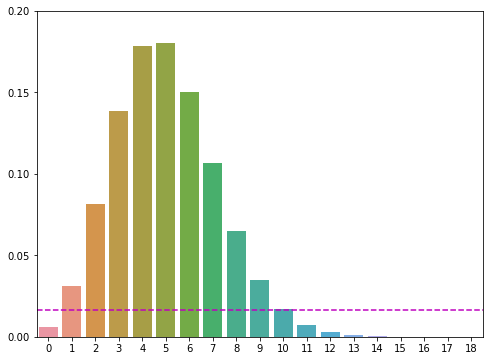

In [48]:
sample_from_binomial(n=100, p=1/20, k=10)

*What's the probability of getting 20 ten or less times?* We can calculate that using `binom.cdf()` method:


In [49]:
binom.cdf(k=10, n=100, p=1/20)

0.9885275899325152

*What's the probability of getting 20 more than ten times?*


In [50]:
1 - binom.cdf(k=10, n=100, p=1/20)

0.011472410067484784

### Poisson Distribution 

For Poisson Distribution we use `poisson` object from `scipy.stats` module

In [51]:
from scipy.stats import poisson

We can sample from Poisson Distribution with $\lambda = 5$ using `poisson.rvs()` method (which is given as $\mu$ for scipy):

In [52]:
poisson.rvs(mu=5, size=100)

array([ 5,  7,  5,  6,  6,  6,  3,  7,  6,  7,  0,  3,  4,  2,  1,  7,  2,
        4,  5,  4,  7,  6,  4,  6,  7,  5,  7,  5,  6,  4,  6,  2, 12,  9,
        3,  2,  3,  8, 10,  6,  3,  5,  4,  6,  5,  5,  8,  6,  5,  3,  6,
        7,  7,  7,  9, 13,  6,  6,  4,  6,  4,  1,  8,  6,  2,  2,  4,  6,
        2,  5,  5,  6,  4,  7,  6,  5,  1,  8,  3,  1, 10,  4,  3,  2,  4,
        7,  5,  2,  5,  7,  3,  4,  4,  5,  6,  8,  0,  3,  6,  4])

*What's the probability of 7 people entering a store in an one-hour period, if we know that 5 people enter the store, in average, in one-hour period?*

In [53]:
poisson.pmf(k=7, mu=5)

0.10444486295705395

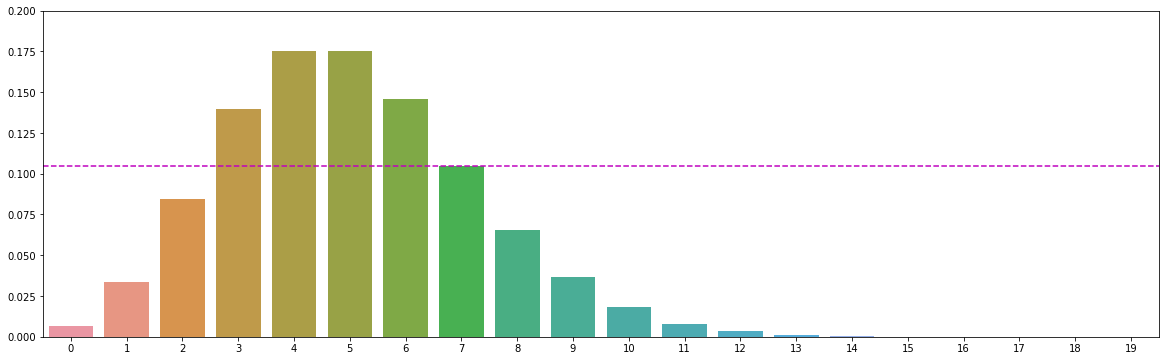

In [54]:
sample_from_poisson(lam=5, k=7)

*On the average, 10 soldiers in the Prussian army were killed accidentally by horse kick monthly. What is the probability that **17 or more** soldies in the Prussian army will be accidently killed by horse kicks during the month?*

In [55]:
1 - poisson.cdf(mu=10, k=17)

0.01427761359704971

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>